# 선형회귀 심화
  - 경사하강법의 종류
  - 과대적합과 정규화
  - 사이킷런을 이용한 선형회귀

  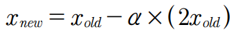

In [110]:
# y= x**2
# y' = 2x



확률적 경사하강법 SGD
  - 장점
    - 업데이트가 빈번하게 이루어지기때문에 성능변화를 빠르게 확인
    - 데이터의 특성에 따라서 훨신 더 빠르게 결과값을 냄
    - 지역 최적화를 회피
  - 단점
    - 대용량 데이터인경우에 시간이 오래걸린다
    - 흔히 튀는현상이 발생해서 마지막에 결과 값을 확인하기 어려움


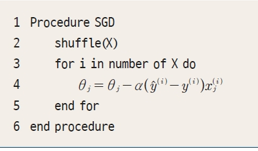

- 미니 배치 경사하강법
  - 데이터의 랜덤한 일부분만 입력해서 경사도 평균을 구함
- 에포크
    - 데이터를 한번에 학습시키는 횟수
      - ex : 전체데이터를 학습에 투입한다고 하면. 학습한번이 1 epoch
        - 미니배치의 배치크기가 20개씩이라면.(전체 100) 20개씩 학습을 5번해야 전체 데이터를 다 학습하고 이것이 1 epoch
        


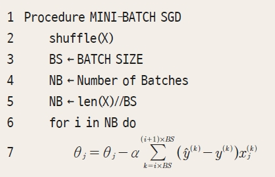

In [111]:
import numpy as np

class LinearRegressionGD(object):
  def __init__(self, fit_intercept=True,copy_X=True, eta0=0.001, epochs=1000, batch_size=1, weight_decay=0.9,shuffle=True):
    self.fit_intercept = fit_intercept
    self.copy_X = copy_X
    self._eta0 = eta0         # 학습률(learning rate)
    self._epochs = epochs     # 전체 데이터에 대한 반복 횟수
    self._batch_size = batch_size  # 배치 크기
    self._weight_decay = weight_decay  # 가중치 감소 매 반복할때마가 학습률을 이 값으로 감소시킨다
    self._cost_history=[]
    self._coef = None
    self._intercept = None
    self._w_history = None
    self._new_X = None
    self._is_SGD = shuffle

  # 기울기 계산
  def gradient(self, X, y, theta):  # theta는 가중치
    return X.T.dot(self.hypothesis_function(X, theta) - y) / len(x)

  # 모델 학습
  def fit(self, X, y):
    self._new_X = np.array(X)  # 데이터 할당
    y = y.reshape(-1, 1)
    if self.fit_intercept:
      pass
    # 가중치 초기화
    theta_init = np.random.normal(0,1, self._new_X.shape[1])
    self._w_history = [theta_init]
    self._cost_history = [
        self.cost(self.hypothesis_function(self._new_X, theta_init), y)
    ]





In [112]:
# dot과 기울기
import numpy as np
x = np.array([[1,2],[3,4],[5,6]])  # 3,2 형태의 입력데이터
theta = np.array([0.5,1.5])
# 예측값
y_pred = x.dot(theta)
print(y_pred)

[ 3.5  7.5 11.5]


SGD(Stochastic Gradient Descent)
  - 전체데이터를 사용하는 것이 아니라 무작위로 선택된 작은 배치(미니배치)를 사용해서 파라미터를 업데이트

In [113]:
import numpy as np

In [114]:
# 손실함수와 기울기 정의
# 손실함수 f(x) = (w-3)**2
# 기울기 : 2(w-3)

In [115]:
def loss_function(w):
  return (w-3)**2
def gradient(w):
  return 2*(w-3)

In [128]:
# SGD 함수 구현
def sgd(learning_rate=0.01, num_iterations=200):  # 학습률, 학습횟수
  # 초기화
  w = np.random.randint(-5,10)
  print(w)
  w_history = [w]
  for i in range(num_iterations):
    grad = gradient(w)  # 현재 파라메터에 대한 기울기 계산
    w -= learning_rate * grad  # 파라메터 업데이트
    w_history.append(w)  # 업데이트된 파라메터 저장
    if i % 10 == 0: # 매 10회 마다 손실 출력
      print(f"Iteration {i}: w = {w:.4f}, loss = {loss_function(w):.4f}")
  return w, w_history

In [133]:
final_w, w_history = sgd(learning_rate=0.01, num_iterations=100)

6
Iteration 0: w = 5.9400, loss = 8.6436
Iteration 10: w = 5.4022, loss = 5.7705
Iteration 20: w = 4.9628, loss = 3.8525
Iteration 30: w = 4.6037, loss = 2.5719
Iteration 40: w = 4.3104, loss = 1.7170
Iteration 50: w = 4.0707, loss = 1.1463
Iteration 60: w = 3.8748, loss = 0.7653
Iteration 70: w = 3.7148, loss = 0.5109
Iteration 80: w = 3.5840, loss = 0.3411
Iteration 90: w = 3.4772, loss = 0.2277


손실함수 시각화

In [134]:
import matplotlib.pyplot as plt

In [135]:
w_values = np.linspace(-5, 10, 100)
loss_values = loss_function(w_values)

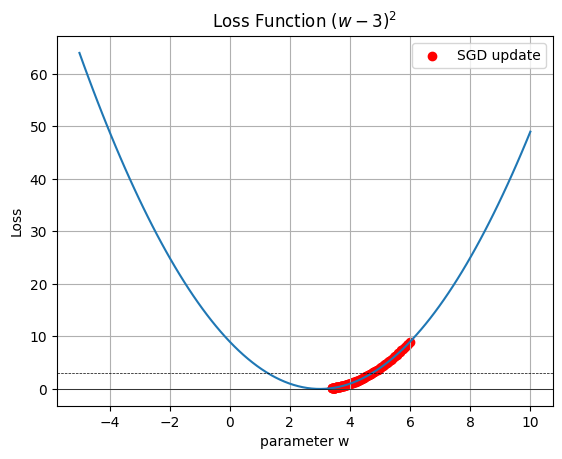

In [136]:
plt.scatter(w_history, [loss_function(w) for w in w_history], color='red', marker='o',label='SGD update')
plt.plot(w_values, loss_values)
plt.axhline(0, color='black', linewidth=0.5)
plt.axhline(3, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('parameter w')
plt.ylabel('Loss')
plt.title('Loss Function $(w - 3)^2$')
plt.grid(True)
plt.legend()
plt.show()

에포크 추가

In [154]:
# SGD 함수 구현
def sgd(learning_rate=0.01, num_epochs=10, num_iterations_per_epoch = 20):
  # 초기화
  w = np.random.randn()
  w_history = [] # 파라미터 값을 저장할 리스트
  epoch_history = [] # 에포트별 손실을 저장할 리스트

  for i in range(num_epochs):
    epoch_w_history = []  # 현재 에포크의 파라미터 이력 저장

    for iteration in range(num_iterations_per_epoch):
      grad = gradient(w)  # 현재 파라메터에 대한 기울기 계산
      w -= learning_rate * grad  # 파라메터 업데이트
      epoch_w_history.append(w)  # 업데이트된 파라메터 저장

    w_history.extend(epoch_w_history)  # 전체 파라미터 이력 업데이트
    epoch_loss = [loss_function(w) for w in epoch_w_history]
    epoch_history.append(epoch_loss)


    print(f"epoch {i}: w = {w:.4f}, loss = {np.mean(epoch_loss):.4f}")
  return w, w_history, epoch_history
# SGD 실행
final_w, w_history, epoch_history =  sgd()

np.mean(np.array(epoch_history),axis=1)

epoch 0: w = 0.8233, loss = 7.1454
epoch 1: w = 1.5468, loss = 3.1847
epoch 2: w = 2.0298, loss = 1.4194
epoch 3: w = 2.3523, loss = 0.6326
epoch 4: w = 2.5676, loss = 0.2820
epoch 5: w = 2.7113, loss = 0.1257
epoch 6: w = 2.8073, loss = 0.0560
epoch 7: w = 2.8713, loss = 0.0250
epoch 8: w = 2.9141, loss = 0.0111
epoch 9: w = 2.9427, loss = 0.0050


array([7.14535044e+00, 3.18468558e+00, 1.41941565e+00, 6.32634128e-01,
       2.81965287e-01, 1.25672042e-01, 5.60120799e-02, 2.49646067e-02,
       1.11267353e-02, 4.95919040e-03])

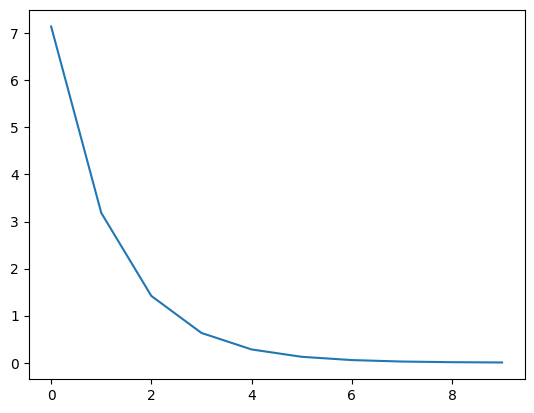

In [155]:
plt.plot(range(10), np.mean(np.array(epoch_history),axis=1))
plt.show()

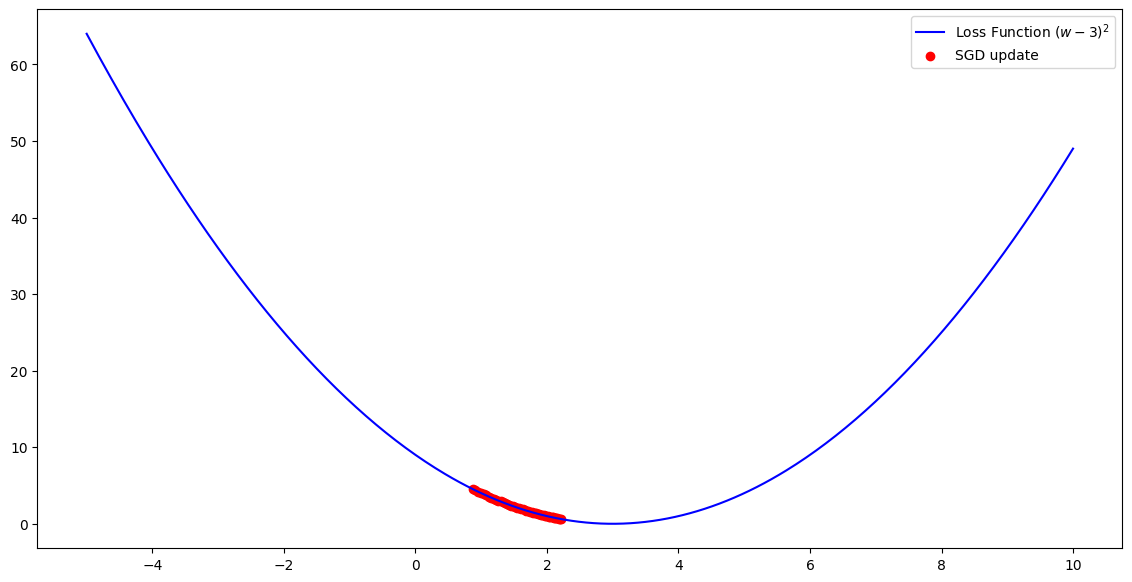

In [146]:
# 손실함수 시각화
w_values = np.linspace(-5, 10, 400)
loss_values = loss_function(w_values)
plt.figure(figsize=(14, 7))
# 손실함수 그래프
plt.plot(w_values, loss_values, label='Loss Function $(w - 3)^2$',color='blue')
# sgd 업데이트 경로
w_history = np.array(w_history)
loss_history = np.array([ loss_function(w) for w in w_history])
plt.scatter(w_history, loss_history, color='red', marker='o',label='SGD update')
plt.legend()
plt.show()


데이터 적용

Epoch 0: Loss = 29.1488
Epoch 10: Loss = 1.0160
Epoch 20: Loss = 1.0043
Epoch 30: Loss = 0.9986
Epoch 40: Loss = 0.9956


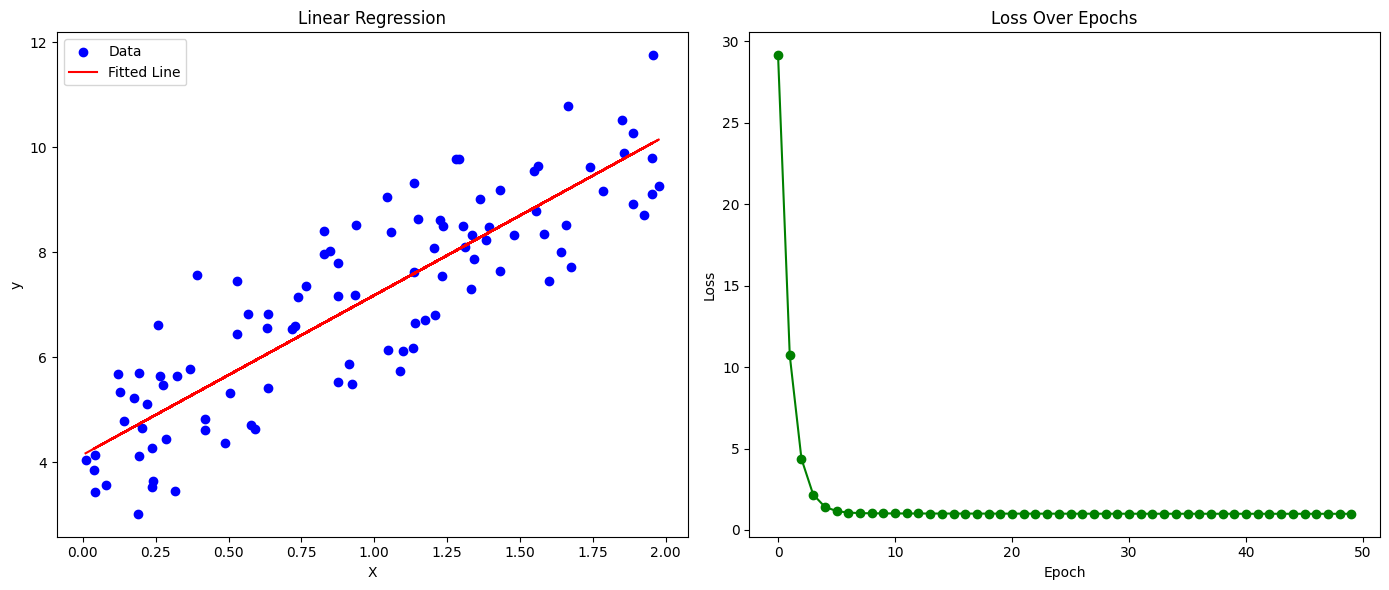

Final parameter: theta = [4.14346761 3.03828569]


In [158]:
import numpy as np
import matplotlib.pyplot as plt

# 실제 데이터 생성
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # 100개의 데이터 포인트, X는 0에서 2 사이
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3 * X + 잡음

# 손실 함수 정의 (평균 제곱 오차)
def loss_function(theta, X, y):
    predictions = X @ theta
    return np.mean((predictions - y) ** 2)

# 기울기 계산 함수 정의
def gradient(theta, X, y):
    predictions = X @ theta
    return 2 / X.shape[0] * X.T @ (predictions - y)

# SGD 함수 정의
def sgd(X, y, learning_rate=0.01, num_epochs=50):
    m, n = X.shape
    theta = np.random.randn(n, 1)  # 초기 파라미터 값
    theta_history = []
    loss_history = []

    for epoch in range(num_epochs):
        grad = gradient(theta, X, y)  # 현재 파라미터에 대한 기울기 계산
        theta -= learning_rate * grad  # 파라미터 업데이트
        theta_history.append(theta.copy())
        loss = loss_function(theta, X, y)
        loss_history.append(loss)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

    return theta, theta_history, loss_history

# 데이터에 상수항을 추가
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # X에 상수항(절편) 추가
final_theta, theta_history, loss_history = sgd(X_b, y, learning_rate=0.1, num_epochs=50)

# 시각화
plt.figure(figsize=(14, 6))

# 데이터와 회귀선 시각화
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, X_b @ final_theta, color='red', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()

# 손실 시각화
plt.subplot(1, 2, 2)
plt.plot(range(len(loss_history)), loss_history, color='green', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')

plt.tight_layout()
plt.show()

print(f"Final parameter: theta = {final_theta.ravel()}")


In [ ]:
# 손실함수 수식

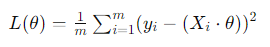

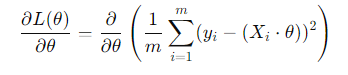

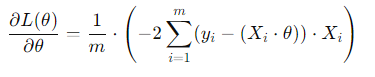

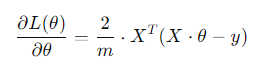